In [1]:

import pandas as pd
from sklearn import datasets
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1a. Obtenga un resumen estadístico de los datos

iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


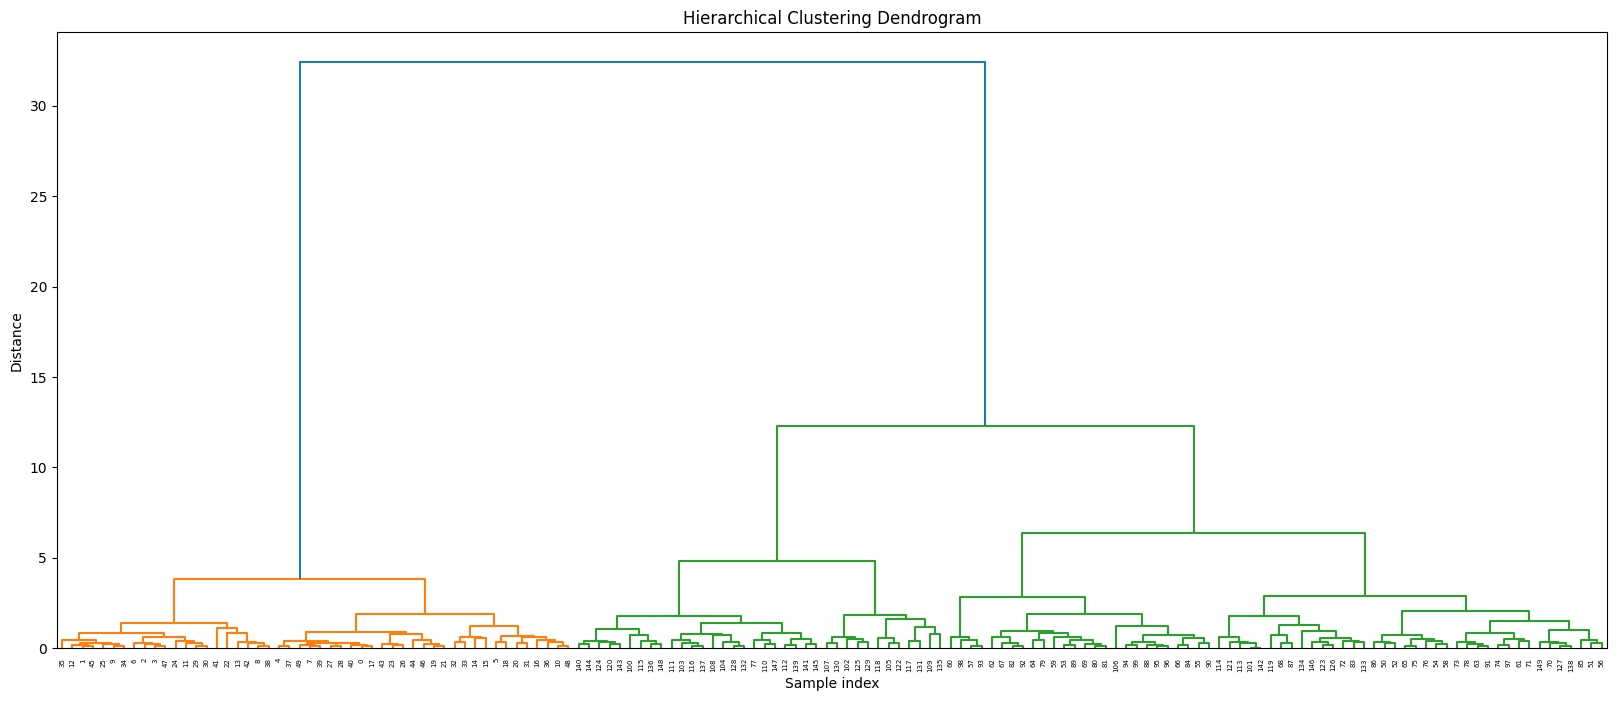

In [2]:

from sklearn.cluster import linkage_tree


X = iris_df.drop(['target'], axis=1)

# generate the linkage matrix
Z = linkage(X, 'ward')

fig, ax = plt.subplots(figsize=(20, 8))
# plot the dendrogram
ax.set_title('Hierarchical Clustering Dendrogram')
ax.set_xlabel('Sample index')
ax.set_ylabel('Distance')

_ = dendrogram(Z, no_labels=False, ax=ax)

In [ ]:
# Perform hierarchical clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)
labels = clustering.labels_